### Import required Libraries 

In [2]:
#  Data manipulation & visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Model building & evaluation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#  NLP libraries: spaCy 
import spacy
nlp = spacy.load("en_core_web_sm")

sns.set()

In [3]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - ------------------------------------- 0.5/12.8 MB 699.0 kB/s eta 0:00:18
     - ------------------------------------- 0.5/12.8 MB 699.0 kB/s eta 0:00:18
     -- ------------------------------------ 0.8/12.8 MB 780.2 kB/s eta 0:00:16
     --- ----------------------------------- 1.0/12.8 MB 811.6 kB/s eta 0:00:15
     --- ----------------------------------- 1.0/12.8 MB 811.6 kB/s eta 0:00:15
     --- ----------------------------------- 1.3/12.8 MB 798.6 kB/s eta 0:00:15
     ---- ---------------------------------- 1.6/12.8 MB 814.1 kB/s eta 0:00:14
     ----- --------------------------------- 1.8/12.8 MB 824.8 kB/s eta 0:00:14
     ----- --------------------------------- 1.8/12.8 MB 824.8 kB/s eta 0:00:14
     ------ -------------------------------- 2.1/12.8 MB 838.7 k

## Load the Data

In [5]:
# Load the balanced reviews dataset
df = pd.read_csv('balanced_reviews_dataset3.csv')
#display the balanced dataset
df

,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,reviewTime,review_length
0,A7MRWQD30ZG1,B002OKLUGW,AmaZonWindowShopper,"[0, 0]",the item was exactly as described but it makes...,4,NIce Product!,"07 1, 2013",24
1,A247P51OUO683W,B005LGUCRE,"M. Prentice ""Splaktar""","[1, 1]",i picked this up at the tmo store the build qu...,3,Does not work with cases and arm is a bit short,"06 22, 2012",204
2,A7M7JDSCN0HMM,B008DJIGR4,Paul Q,"[0, 0]",the case fits the phone well except around the...,1,"Poor fit around the volume button, skip this one","08 21, 2013",97
3,A2EK2UMX5LNCAI,B00687N0GK,Dave H,"[0, 0]",very compact but found it kinda difficult to p...,3,Wish it was easier to place/Remove the phone,"10 8, 2012",47
4,A4S2GMZIQKEHY,B004VN09LM,Eldude,"[0, 0]",off the top i will say that depending on who y...,3,Its...okay,"11 4, 2012",128
...,...,...,...,...,...,...,...,...,...
9995,A36XRXX2WQWAWC,B007Z0VXHM,Kanitra,"[0, 0]",for the price this bumper is pretty good its d...,3,decent,"12 14, 2012",39
9996,A2L0KSRC92EGK3,B00FUXV6QO,aaron,"[0, 0]",if you are looking for a cheap case to protect...,3,nothing smart about it!!!!!,"05 3, 2014",21
9997,A3PEM0PUG9YHD5,B00004WINT,usnrma,"[0, 0]",these are the exact ones that i was looking fo...,3,They are ok,"01 23, 2014",88
9998,A3LQVXPXFRZKGO,B0035R2QS4,vishal,"[0, 0]",a compete waste of money and expectations too ...,1,never worked,"04 23, 2014",26


In [6]:
df_two = df[['reviewText', 'Rating','review_length']]

In [7]:
df_two

,reviewText,Rating,review_length
0,the item was exactly as described but it makes...,4,24
1,i picked this up at the tmo store the build qu...,3,204
2,the case fits the phone well except around the...,1,97
3,very compact but found it kinda difficult to p...,3,47
4,off the top i will say that depending on who y...,3,128
...,...,...,...
9995,for the price this bumper is pretty good its d...,3,39
9996,if you are looking for a cheap case to protect...,3,21
9997,these are the exact ones that i was looking fo...,3,88
9998,a compete waste of money and expectations too ...,1,26


In [8]:
#shape of the dataset
df_two.shape

(10000, 3)

In [9]:
#columns of the dataframe
df_two.columns

Index(['reviewText', 'Rating', 'review_length'], dtype='object')

In [10]:
#checking if there is any null values present
df_two.isnull().sum()

reviewText       0
Rating           0
review_length    0
dtype: int64

In [11]:
#checking for the duplicate values
df_two.duplicated().sum()

1

In [12]:
#display 3 full sample reviews per rating
for rating in sorted(df_two['Rating'].unique()):
    print(f"\n⭐ Rating {rating}")
    reviews = df[df['Rating'] == rating].tail(3)
    for _, row in reviews.iterrows():
        print(f"- {row['reviewText']}")



⭐ Rating 1
- 3000mah is roughly twice the capacity of an iphone 4 which i used for music and nike app while trail running the phone alone 1400mah could last 34 hours with audio gps and miscellaneous nearconstant activity it stands to reason that the anker 3000mah could at least double the usable span if not triple itafter a particular run i ran the phone down to 45 and plugged it into the anker while i entertained myself on the phone and waited for a long series of photographic exposures after an hour of charging the phone the anker had been drained and the phone was back on its own power without having been recharged further than another 15 by the ankerive got another battery cell thats at least four times heavier higher capacity also that doesnt selfdischarge nearly as badly as this but its half again as heavy as a loaded ultralight trail running backpack
- this is not the same useful juice pack i have come to expect from mophie saw it at the apple store today and bought it with out

In [13]:
df_two['word_count'] = df_two['reviewText'].apply(lambda x: len(str(x).split()))

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_7560\2645031176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_two['word_count'] = df_two['reviewText'].apply(lambda x: len(str(x).split()))


In [14]:
#display the statistics of the word count
min_word_counts = df_two.groupby('Rating')['word_count'].describe()
print(min_word_counts)


         count     mean        std  min   25%   50%    75%    max
Rating                                                           
1       2000.0  66.5735  57.399486  4.0  27.0  46.0   82.0  348.0
2       2000.0  79.1530  68.230281  4.0  31.0  53.5  102.0  348.0
3       2000.0  79.1330  71.235585  4.0  29.0  50.0  104.0  350.0
4       2000.0  82.5520  73.502752  4.0  30.0  54.0  106.0  349.0
5       2000.0  66.9570  64.794122  4.0  26.0  40.5   77.0  347.0


In [15]:
df_two

,reviewText,Rating,review_length,word_count
0,the item was exactly as described but it makes...,4,24,24
1,i picked this up at the tmo store the build qu...,3,204,204
2,the case fits the phone well except around the...,1,97,97
3,very compact but found it kinda difficult to p...,3,47,47
4,off the top i will say that depending on who y...,3,128,128
...,...,...,...,...
9995,for the price this bumper is pretty good its d...,3,39,39
9996,if you are looking for a cheap case to protect...,3,21,21
9997,these are the exact ones that i was looking fo...,3,88,88
9998,a compete waste of money and expectations too ...,1,26,26


## Data Visualisation
### Bar graph for Rating distribution

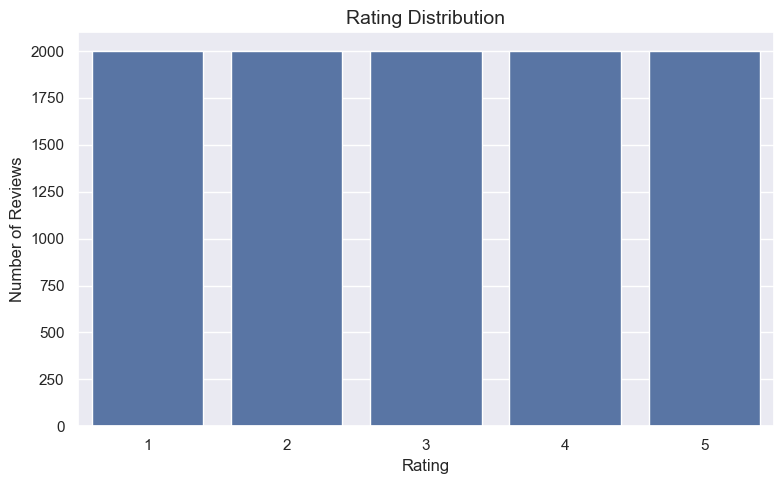

In [17]:
#  Visualize the distribution of review ratings

plt.figure(figsize=(8, 5))  # Set figure size

# Create a count plot for the 'Rating' column
sns.countplot(x='Rating', data=df_two)

# Add plot titles and labels
plt.title("Rating Distribution", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


###  Review Length Distribution using Histogram

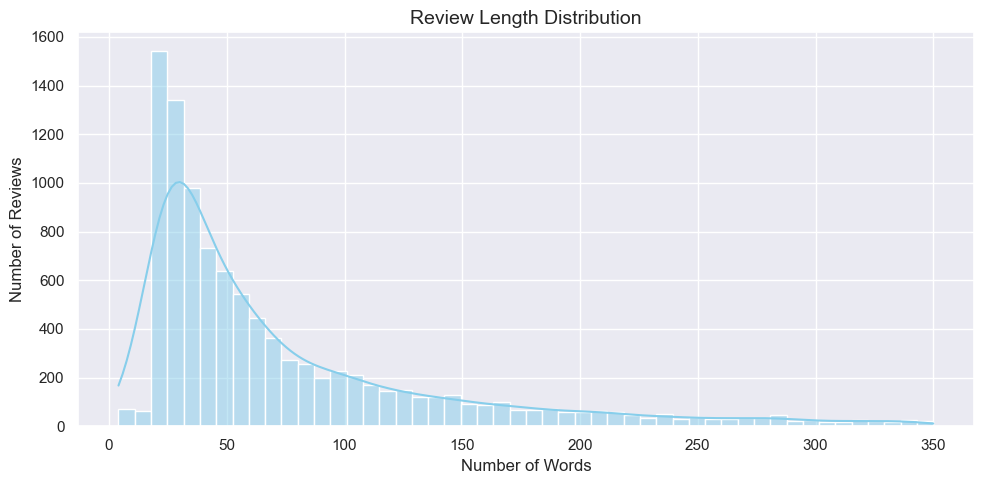

In [19]:
# Visualize the distribution of review lengths (number of words per review)

plt.figure(figsize=(10, 5))  # Set the size of the plot

# Create a histogram of review lengths with a KDE (smoothed line)
sns.histplot(data=df_two, x='review_length', bins=50, kde=True, color='skyblue')

# Add titles and axis labels
plt.title("Review Length Distribution", fontsize=14)
plt.xlabel("Number of Words", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)

# Improve layout and display the plot
plt.tight_layout()
plt.show()



###  Visualize rating distribution using a pie chart


In [21]:
# Count the number of reviews per rating (sorted by rating value)
rating_counts = df_two['Rating'].value_counts().sort_index()

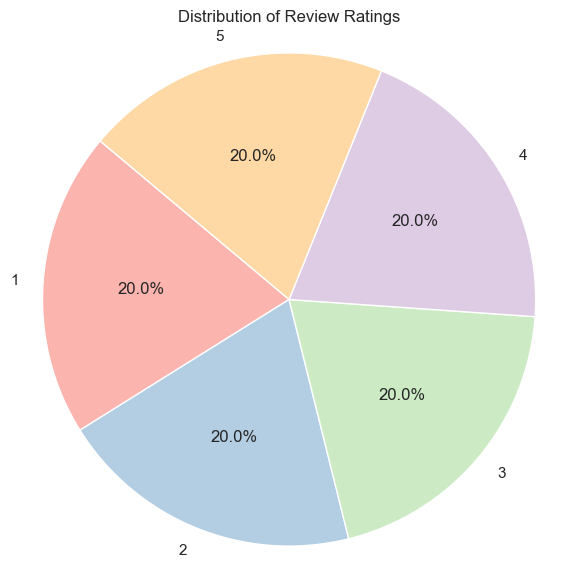

In [22]:
# Labels for pie slices (e.g., '1', '2', ..., '5')
labels = rating_counts.index.astype(str)
#Corresponding values (number of reviews per rating)
sizes = rating_counts.values

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Review Ratings')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.show()

## Train-Test-Split

In [24]:
#  Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(df_two['reviewText'], df_two['Rating'], test_size=0.2, random_state=42,stratify=df_two['Rating'] )

### Lemmatization and Stopword Removal

In [26]:
def spacy_preprocess(text):
    """
    Preprocess text using spaCy:
    - Tokenize the text
    - Remove stopwords and space tokens using spaCy
    - Lemmatize using spaCy

    Args:
        text (str): Input text

    Returns:
        str: Cleaned and lemmatized text
    """
    # Process the text using spaCy
    doc = nlp(text)

    # Filter and lemmatize
    tokens = [
        token.lemma_                      # spaCy lemmatization
        for token in doc
        if not token.is_stop and         # spaCy stopword removal
           not token.is_space and
           token.is_alpha                # Keep only alphabetic words (optional)
    ]

    return ' '.join(tokens)


In [27]:
#print the list of stopwords 
print(sorted(nlp.Defaults.stop_words))

["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'have', 'he', 'hence', 'her', 'here', 'he

In [28]:
# Apply stopword removal and lemmatization to the training and test text data

# Apply preprocessing to each review in the training set
X_train = X_train.apply(spacy_preprocess)

# Apply preprocessing to each review in the test set
X_test = X_test.apply(spacy_preprocess)


In [29]:
#shows the stopword removal and lemmatized text 
print(X_train.sample(5).values)

['buy cord month ago pink problem use night charger decide trip use case pink go take awhile arrive not work pink forever charge work maybe get bad pink one work great use recommend certain not great get job guess'
 'pleased use clip come stylus wand stay'
 'receive car charger week completely break open get sprint replace try avoid'
 'small soft rubber tip allow select exactly want husband large hand thick finger trouble type keypad htc evo g get will not let swipe sticky swipe not problem not require precision typing get mean spare case get lose great deal highly recommend'
 'work great little month die replace thing happen stay work perfect maybe get bad batch']


In [30]:
# Initialize and fit TF-IDF on training only
tfidf = TfidfVectorizer(max_features=5000)  
X_train_tfidf = tfidf.fit_transform(X_train)
# Transform test using the same fitted vectorizer
X_test_tfidf = tfidf.transform(X_test)

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)


              precision    recall  f1-score   support

           1       0.45      0.65      0.53       400
           2       0.29      0.19      0.23       400
           3       0.34      0.28      0.30       400
           4       0.40      0.37      0.38       400
           5       0.52      0.61      0.56       400

    accuracy                           0.42      2000
   macro avg       0.40      0.42      0.40      2000
weighted avg       0.40      0.42      0.40      2000



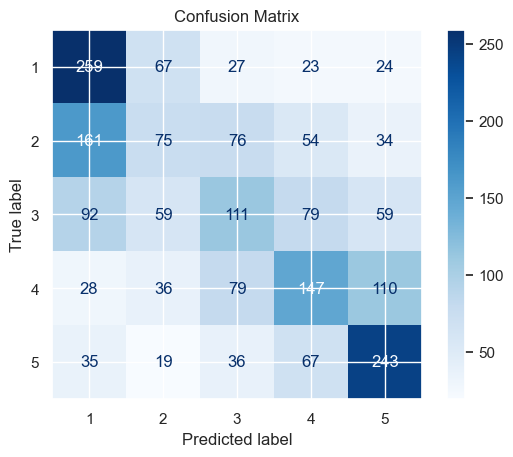

In [32]:
# Classification report
print(classification_report(y_test, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=sorted(y_test.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y_test.unique()))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
